In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from google.colab import drive
drive.mount("/content/drive")
from os import walk
import cv2

Mounted at /content/drive


In [2]:
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in walk("/content/drive/My Drive/train/with_mask"):
    listeFichiers.extend(fichiers)
withMaskTrain=[]
for fichier in listeFichiers:
    img=cv2.imread("/content/drive/My Drive/train/with_mask/"+fichier)
    img=cv2.resize(img,(96,96))
    withMaskTrain.append(img)

In [3]:
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in walk("/content/drive/My Drive/train/without_mask"):
    listeFichiers.extend(fichiers)

withoutMaskTrain=[]
for fichier in listeFichiers:
    img=cv2.imread("/content/drive/My Drive/train/without_mask/"+fichier)
    img=cv2.resize(img,(96,96))
    withoutMaskTrain.append(img)

In [4]:
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in walk("/content/drive/My Drive/test/without_mask"):
    listeFichiers.extend(fichiers)

withoutMaskTest=[]
for fichier in listeFichiers:
    img=cv2.imread("/content/drive/My Drive/test/without_mask/"+fichier)
    img=cv2.resize(img,(96,96))
    withoutMaskTest.append(img)

In [5]:
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in walk("/content/drive/My Drive/test/with_mask"):
    listeFichiers.extend(fichiers)

withMaskTest=[]
for fichier in listeFichiers:
    img=cv2.imread("/content/drive/My Drive/test/with_mask/"+fichier)
    img=cv2.resize(img,(96,96))
    withMaskTest.append(img)

In [6]:
withMaskTrainListValue=[]
for i in range(len(withMaskTrain)):
    withMaskTrainListValue.append(1)

withoutMaskTrainListValue=[]
for i in range(len(withoutMaskTrain)):
    withoutMaskTrainListValue.append(0)

X_train=withMaskTrain+withoutMaskTrain
y_train=withMaskTrainListValue+withoutMaskTrainListValue

print(len(X_train))
print(len(y_train))

1898
1898


In [7]:
withMaskTestListValue=[]
for i in range(len(withMaskTest)):
    withMaskTestListValue.append(1)

withoutMaskTestListValue=[]
for i in range(len(withoutMaskTest)):
    withoutMaskTestListValue.append(0)

X_test=withMaskTest+withoutMaskTest
y_test=withMaskTestListValue+withoutMaskTestListValue

print(len(X_test))
print(len(y_test))

642
642


In [8]:
X_train[0]

array([[[ 26,  26,  26],
        [ 25,  25,  25],
        [ 22,  22,  22],
        ...,
        [  7,   7,  17],
        [  7,   7,  17],
        [  7,   7,  17]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [  5,   5,   5],
        ...,
        [ 31,  32,  42],
        [ 31,  32,  42],
        [ 31,  32,  42]],

       [[  5,   5,   5],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [ 50,  51,  61],
        [ 50,  51,  61],
        [ 50,  51,  61]],

       ...,

       [[139, 156, 196],
        [141, 159, 196],
        [142, 160, 197],
        ...,
        [170, 180, 205],
        [169, 179, 204],
        [165, 174, 199]],

       [[146, 163, 201],
        [147, 164, 201],
        [148, 166, 203],
        ...,
        [164, 173, 201],
        [166, 174, 203],
        [164, 172, 201]],

       [[152, 164, 198],
        [153, 165, 199],
        [154, 166, 200],
        ...,
        [158, 170, 198],
        [159, 171, 199],
        [160, 172, 200]]

In [9]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [10]:
X_train=X_train.reshape(-1,96,96,3).astype('float')/255
X_test=X_test.reshape(-1,96,96,3).astype('float')/255

In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(96, 
                                                              96,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation ='relu',padding='same',input_shape = (96, 96, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation ='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation ='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation ='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(64,activation ='relu'))
model.add(tf.keras.layers.Dense(32,activation ='relu'))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [13]:

history = model.fit(X_train,
                    y_train,
                    epochs=300,
                    validation_split=0.1,
                    shuffle=True
                    ) 

Epoch 1/300
54/54 [==============================] - 8s 18ms/step - loss: 0.6686 - accuracy: 0.5675 - val_loss: 0.8738 - val_accuracy: 0.0263
Epoch 2/300
54/54 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.8076 - val_loss: 1.0314 - val_accuracy: 0.3105
Epoch 3/300
54/54 [==============================] - 1s 9ms/step - loss: 0.2721 - accuracy: 0.9123 - val_loss: 0.7186 - val_accuracy: 0.6684
Epoch 4/300
54/54 [==============================] - 0s 8ms/step - loss: 0.1536 - accuracy: 0.9521 - val_loss: 0.3770 - val_accuracy: 0.8421
Epoch 5/300
54/54 [==============================] - 0s 7ms/step - loss: 0.1238 - accuracy: 0.9644 - val_loss: 0.7222 - val_accuracy: 0.7368
Epoch 6/300
54/54 [==============================] - 0s 7ms/step - loss: 0.1202 - accuracy: 0.9700 - val_loss: 0.5095 - val_accuracy: 0.8053
Epoch 7/300
54/54 [==============================] - 0s 8ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.6834 - val_accuracy: 0.7737
Epoch 8/300


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


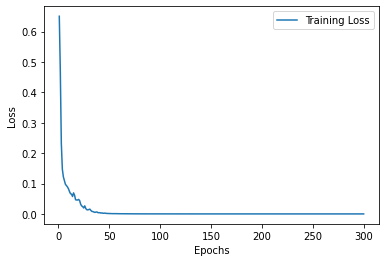

Nous avons une accuracy de : 0.9766355140186916


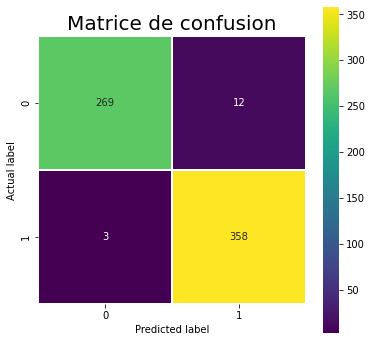

In [14]:
from sklearn import metrics
import seaborn as sns
y_pred=model.predict_classes(X_test)
score=metrics.accuracy_score(y_test,y_pred)

loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("Nous avons une accuracy de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [15]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
model.save("/content/drive/My Drive/model_mask/model")

INFO:tensorflow:Assets written to: /content/drive/My Drive/model_mask/model/assets


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]


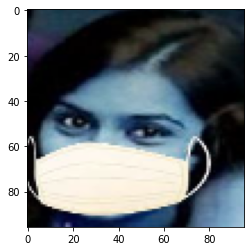

In [17]:
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("/content/drive/My Drive/test3.jpg")

img = cv2.resize(img,(96,96))
img2 = img.reshape(-1,96,96,3)


y_pred= model.predict_classes(img2)

plt.imshow(img,cmap='gray')
print(y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0]


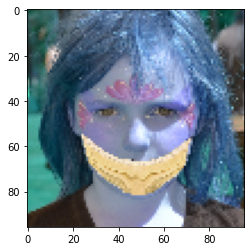

In [18]:
img=X_test[635]
img2=img.reshape(-1,96,96,3)
y_pred= model.predict_classes(img2)
plt.imshow(img)
print(y_pred)